In [111]:
import pandas as pd
import tensorflow as tf
from tensorflow.keras import models, layers , optimizers 
import numpy as np
import matplotlib.pyplot as plt

In [112]:
data = pd.read_csv('E:\\Kaggle datasets\\ionosphere_data.csv')
data

,feature1,feature2,feature3,feature4,feature5,feature6,feature7,feature8,feature9,feature10,...,feature26,feature27,feature28,feature29,feature30,feature31,feature32,feature33,feature34,label
0,1,0,0.99539,-0.05889,0.85243,0.02306,0.83398,-0.37708,1.00000,0.03760,...,-0.51171,0.41078,-0.46168,0.21266,-0.34090,0.42267,-0.54487,0.18641,-0.45300,g
1,1,0,1.00000,-0.18829,0.93035,-0.36156,-0.10868,-0.93597,1.00000,-0.04549,...,-0.26569,-0.20468,-0.18401,-0.19040,-0.11593,-0.16626,-0.06288,-0.13738,-0.02447,b
2,1,0,1.00000,-0.03365,1.00000,0.00485,1.00000,-0.12062,0.88965,0.01198,...,-0.40220,0.58984,-0.22145,0.43100,-0.17365,0.60436,-0.24180,0.56045,-0.38238,g
3,1,0,1.00000,-0.45161,1.00000,1.00000,0.71216,-1.00000,0.00000,0.00000,...,0.90695,0.51613,1.00000,1.00000,-0.20099,0.25682,1.00000,-0.32382,1.00000,b
4,1,0,1.00000,-0.02401,0.94140,0.06531,0.92106,-0.23255,0.77152,-0.16399,...,-0.65158,0.13290,-0.53206,0.02431,-0.62197,-0.05707,-0.59573,-0.04608,-0.65697,g
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
346,1,0,0.83508,0.08298,0.73739,-0.14706,0.84349,-0.05567,0.90441,-0.04622,...,-0.04202,0.83479,0.00123,1.00000,0.12815,0.86660,-0.10714,0.90546,-0.04307,g
347,1,0,0.95113,0.00419,0.95183,-0.02723,0.93438,-0.01920,0.94590,0.01606,...,0.01361,0.93522,0.04925,0.93159,0.08168,0.94066,-0.00035,0.91483,0.04712,g
348,1,0,0.94701,-0.00034,0.93207,-0.03227,0.95177,-0.03431,0.95584,0.02446,...,0.03193,0.92489,0.02542,0.92120,0.02242,0.92459,0.00442,0.92697,-0.00577,g
349,1,0,0.90608,-0.01657,0.98122,-0.01989,0.95691,-0.03646,0.85746,0.00110,...,-0.02099,0.89147,-0.07760,0.82983,-0.17238,0.96022,-0.03757,0.87403,-0.16243,g


In [113]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 351 entries, 0 to 350
Data columns (total 35 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   feature1   351 non-null    int64  
 1   feature2   351 non-null    int64  
 2   feature3   351 non-null    float64
 3   feature4   351 non-null    float64
 4   feature5   351 non-null    float64
 5   feature6   351 non-null    float64
 6   feature7   351 non-null    float64
 7   feature8   351 non-null    float64
 8   feature9   351 non-null    float64
 9   feature10  351 non-null    float64
 10  feature11  351 non-null    float64
 11  feature12  351 non-null    float64
 12  feature13  351 non-null    float64
 13  feature14  351 non-null    float64
 14  feature15  351 non-null    float64
 15  feature16  351 non-null    float64
 16  feature17  351 non-null    float64
 17  feature18  351 non-null    float64
 18  feature19  351 non-null    float64
 19  feature20  351 non-null    float64
 20  feature21 

In [114]:
data['label']

0      g
1      b
2      g
3      b
4      g
      ..
346    g
347    g
348    g
349    g
350    g
Name: label, Length: 351, dtype: object

In [115]:
from sklearn.preprocessing import LabelEncoder
data['label']=data['label'].map({'g':1, 'b':0})

In [116]:
data

,feature1,feature2,feature3,feature4,feature5,feature6,feature7,feature8,feature9,feature10,...,feature26,feature27,feature28,feature29,feature30,feature31,feature32,feature33,feature34,label
0,1,0,0.99539,-0.05889,0.85243,0.02306,0.83398,-0.37708,1.00000,0.03760,...,-0.51171,0.41078,-0.46168,0.21266,-0.34090,0.42267,-0.54487,0.18641,-0.45300,1
1,1,0,1.00000,-0.18829,0.93035,-0.36156,-0.10868,-0.93597,1.00000,-0.04549,...,-0.26569,-0.20468,-0.18401,-0.19040,-0.11593,-0.16626,-0.06288,-0.13738,-0.02447,0
2,1,0,1.00000,-0.03365,1.00000,0.00485,1.00000,-0.12062,0.88965,0.01198,...,-0.40220,0.58984,-0.22145,0.43100,-0.17365,0.60436,-0.24180,0.56045,-0.38238,1
3,1,0,1.00000,-0.45161,1.00000,1.00000,0.71216,-1.00000,0.00000,0.00000,...,0.90695,0.51613,1.00000,1.00000,-0.20099,0.25682,1.00000,-0.32382,1.00000,0
4,1,0,1.00000,-0.02401,0.94140,0.06531,0.92106,-0.23255,0.77152,-0.16399,...,-0.65158,0.13290,-0.53206,0.02431,-0.62197,-0.05707,-0.59573,-0.04608,-0.65697,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
346,1,0,0.83508,0.08298,0.73739,-0.14706,0.84349,-0.05567,0.90441,-0.04622,...,-0.04202,0.83479,0.00123,1.00000,0.12815,0.86660,-0.10714,0.90546,-0.04307,1
347,1,0,0.95113,0.00419,0.95183,-0.02723,0.93438,-0.01920,0.94590,0.01606,...,0.01361,0.93522,0.04925,0.93159,0.08168,0.94066,-0.00035,0.91483,0.04712,1
348,1,0,0.94701,-0.00034,0.93207,-0.03227,0.95177,-0.03431,0.95584,0.02446,...,0.03193,0.92489,0.02542,0.92120,0.02242,0.92459,0.00442,0.92697,-0.00577,1
349,1,0,0.90608,-0.01657,0.98122,-0.01989,0.95691,-0.03646,0.85746,0.00110,...,-0.02099,0.89147,-0.07760,0.82983,-0.17238,0.96022,-0.03757,0.87403,-0.16243,1


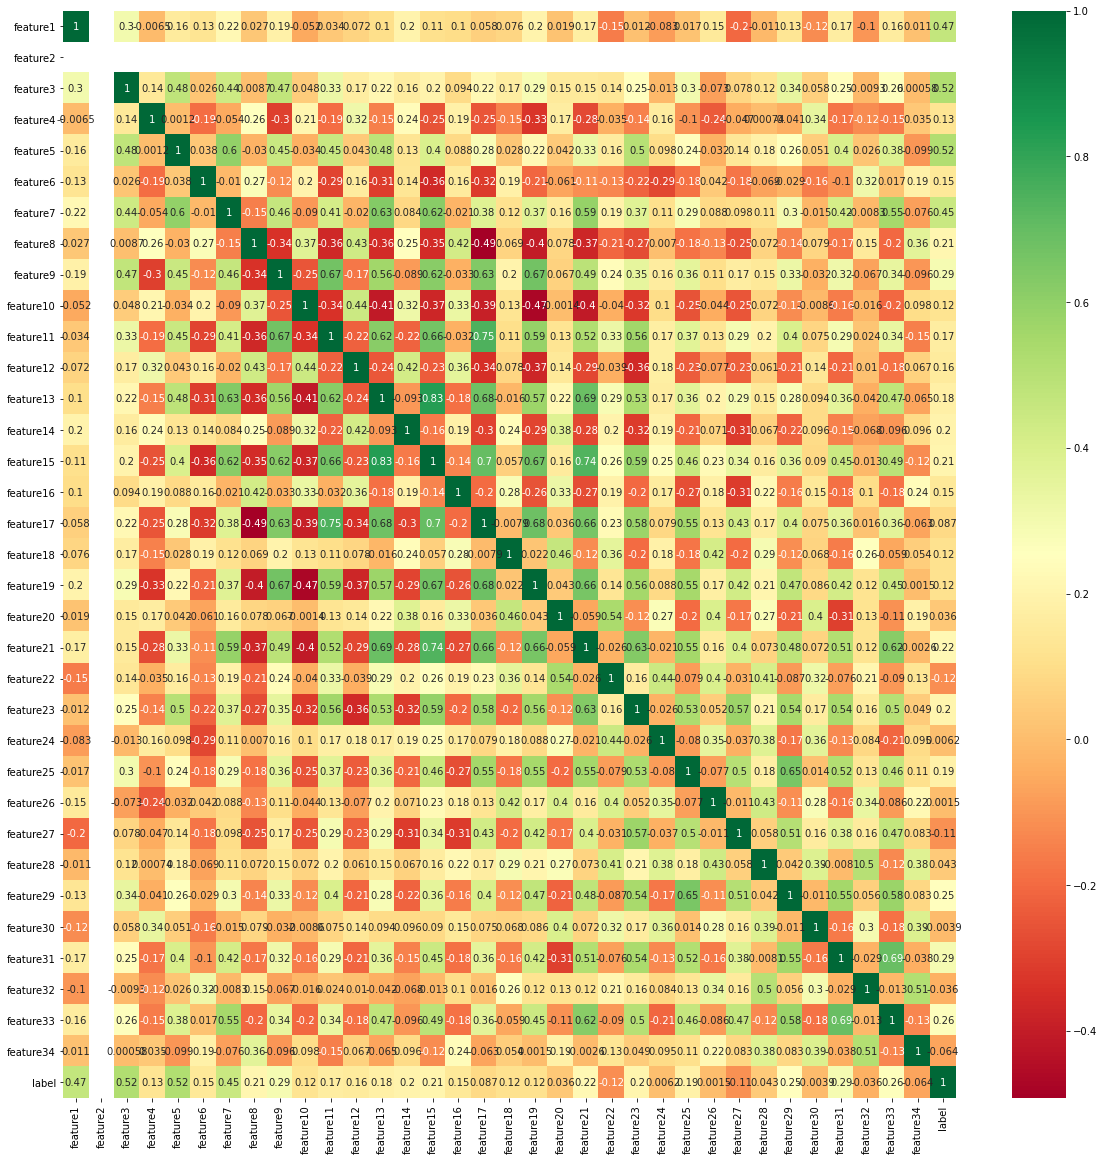

In [117]:
import seaborn
corelation = data.corr()
top_corelated_features = corelation.index
plt.figure(figsize=(20,20))
graph = seaborn.heatmap(data[top_corelated_features].corr(),annot=True, cmap="RdYlGn")

In [118]:
x = (data.loc[:, data.columns!='label'])
y = (data.loc[:,data.columns=='label'])

In [119]:
x

,feature1,feature2,feature3,feature4,feature5,feature6,feature7,feature8,feature9,feature10,...,feature25,feature26,feature27,feature28,feature29,feature30,feature31,feature32,feature33,feature34
0,1,0,0.99539,-0.05889,0.85243,0.02306,0.83398,-0.37708,1.00000,0.03760,...,0.56811,-0.51171,0.41078,-0.46168,0.21266,-0.34090,0.42267,-0.54487,0.18641,-0.45300
1,1,0,1.00000,-0.18829,0.93035,-0.36156,-0.10868,-0.93597,1.00000,-0.04549,...,-0.20332,-0.26569,-0.20468,-0.18401,-0.19040,-0.11593,-0.16626,-0.06288,-0.13738,-0.02447
2,1,0,1.00000,-0.03365,1.00000,0.00485,1.00000,-0.12062,0.88965,0.01198,...,0.57528,-0.40220,0.58984,-0.22145,0.43100,-0.17365,0.60436,-0.24180,0.56045,-0.38238
3,1,0,1.00000,-0.45161,1.00000,1.00000,0.71216,-1.00000,0.00000,0.00000,...,1.00000,0.90695,0.51613,1.00000,1.00000,-0.20099,0.25682,1.00000,-0.32382,1.00000
4,1,0,1.00000,-0.02401,0.94140,0.06531,0.92106,-0.23255,0.77152,-0.16399,...,0.03286,-0.65158,0.13290,-0.53206,0.02431,-0.62197,-0.05707,-0.59573,-0.04608,-0.65697
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
346,1,0,0.83508,0.08298,0.73739,-0.14706,0.84349,-0.05567,0.90441,-0.04622,...,0.95378,-0.04202,0.83479,0.00123,1.00000,0.12815,0.86660,-0.10714,0.90546,-0.04307
347,1,0,0.95113,0.00419,0.95183,-0.02723,0.93438,-0.01920,0.94590,0.01606,...,0.94520,0.01361,0.93522,0.04925,0.93159,0.08168,0.94066,-0.00035,0.91483,0.04712
348,1,0,0.94701,-0.00034,0.93207,-0.03227,0.95177,-0.03431,0.95584,0.02446,...,0.93988,0.03193,0.92489,0.02542,0.92120,0.02242,0.92459,0.00442,0.92697,-0.00577
349,1,0,0.90608,-0.01657,0.98122,-0.01989,0.95691,-0.03646,0.85746,0.00110,...,0.91050,-0.02099,0.89147,-0.07760,0.82983,-0.17238,0.96022,-0.03757,0.87403,-0.16243


In [120]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.20, random_state=42)

In [121]:
x_train.shape

(280, 34)

In [122]:
x_test.shape

(71, 34)

In [123]:
x_test

,feature1,feature2,feature3,feature4,feature5,feature6,feature7,feature8,feature9,feature10,...,feature25,feature26,feature27,feature28,feature29,feature30,feature31,feature32,feature33,feature34
157,1,0,0.47090,0.22751,0.42328,0.33598,0.25661,0.47619,0.01852,0.49471,...,-0.23280,0.00265,0.03574,-0.31739,0.15873,-0.21693,0.24868,-0.24339,0.26720,0.04233
342,1,0,0.82254,-0.07572,0.80462,0.00231,0.87514,-0.01214,0.86821,-0.07514,...,0.74451,-0.02370,0.76717,-0.02731,0.74046,-0.07630,0.70058,-0.04220,0.78439,0.01214
316,1,0,0.89589,0.39286,0.66129,0.71804,0.29521,0.90824,-0.04787,0.94415,...,0.21581,-0.85703,0.53229,-0.68593,0.74846,-0.40656,0.83142,-0.07029,0.76862,0.27926
234,1,0,0.68729,1.00000,0.91973,-0.76087,0.81773,0.04348,0.76087,0.10702,...,1.00000,-0.53846,0.89262,0.22216,0.71070,0.53846,1.00000,-0.06522,0.56522,0.23913
155,1,0,0.72414,-0.01084,0.79704,0.01084,0.80000,0.00197,0.79015,0.01084,...,0.72611,-0.01478,0.78041,0.00612,0.74089,-0.05025,0.82956,0.02956,0.79015,0.00788
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
181,1,0,1.00000,0.24077,0.99815,0.00369,0.80244,-0.30133,0.89919,-0.23486,...,0.23966,-0.52142,0.29208,-0.48390,0.12777,-0.39143,0.15657,-0.51329,0.18353,-0.46603
179,1,0,1.00000,-0.08183,1.00000,-0.11326,0.99246,-0.29802,1.00000,-0.33075,...,0.67033,-0.96296,0.48757,-0.85669,0.37941,-0.83893,0.24117,-0.88846,0.29221,-0.89621
199,1,0,0.79847,0.38265,0.80804,-0.16964,1.00000,-0.07653,0.98151,-0.07398,...,1.00000,-0.14541,1.00000,-0.00394,0.75638,0.07908,1.00000,-0.18750,1.00000,-0.05740
327,1,0,1.00000,1.00000,0.36700,0.06158,0.12993,0.92713,-0.27586,0.93596,...,0.73792,-0.45950,0.85471,-0.06831,1.00000,1.00000,0.38670,0.00246,0.17758,0.79790


In [124]:
y_test

,label
157,1
342,1
316,1
234,0
155,1
...,...
181,1
179,1
199,1
327,1


In [125]:
x_train, x_val, y_train, y_val = train_test_split(x_train, y_train, test_size=0.30)

In [126]:
x_train.shape

(196, 34)

In [127]:
x_val.shape

(84, 34)

In [128]:
x_test.shape

(71, 34)

In [129]:
x_train

,feature1,feature2,feature3,feature4,feature5,feature6,feature7,feature8,feature9,feature10,...,feature25,feature26,feature27,feature28,feature29,feature30,feature31,feature32,feature33,feature34
263,1,0,0.89410,0.13425,0.87001,0.31543,0.78896,0.43388,0.63388,0.59975,...,-0.40552,0.50489,-0.46215,0.40753,-0.50314,0.27252,-0.52823,0.19172,-0.48808,0.05972
153,1,0,0.94653,0.28713,0.72554,0.67248,0.47564,0.82455,0.01267,0.89109,...,-0.04119,-0.64792,0.16085,-0.56420,0.36752,-0.41901,0.46059,-0.22535,0.50376,-0.05980
54,1,0,0.95659,0.08143,0.97487,-0.05667,0.97165,-0.08484,0.96097,-0.06561,...,0.99899,-0.40747,0.87244,-0.34586,0.92059,-0.30619,0.83951,-0.39061,0.82166,-0.41173
320,1,0,1.00000,-0.01179,1.00000,-0.00343,1.00000,-0.01565,1.00000,-0.01565,...,1.00000,-0.04931,0.99842,-0.05527,0.99400,-0.06304,0.99057,-0.06497,0.98971,-0.06668
117,1,0,0.98182,0.00000,0.88627,0.03131,0.86249,0.04572,0.80000,0.00000,...,0.74545,0.22727,0.64581,0.15088,0.67273,0.02727,0.60715,0.16465,0.58840,0.17077
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
64,1,0,1.00000,-0.41457,1.00000,0.76131,0.87060,0.18593,1.00000,-0.09925,...,0.93593,0.10678,0.92890,-0.07249,1.00000,-0.27387,0.43970,0.19849,0.51382,-0.05402
346,1,0,0.83508,0.08298,0.73739,-0.14706,0.84349,-0.05567,0.90441,-0.04622,...,0.95378,-0.04202,0.83479,0.00123,1.00000,0.12815,0.86660,-0.10714,0.90546,-0.04307
164,1,0,1.00000,1.00000,1.00000,0.51250,0.62500,-1.00000,1.00000,1.00000,...,1.00000,1.00000,1.00000,1.00000,1.00000,1.00000,-0.94375,1.00000,0.00000,0.00000
17,0,0,0.00000,0.00000,-1.00000,-1.00000,1.00000,1.00000,-1.00000,1.00000,...,-1.00000,1.00000,1.00000,-1.00000,-1.00000,1.00000,-1.00000,-1.00000,1.00000,-1.00000


In [130]:
from tensorflow.keras import models, layers, optimizers
def building_model():
    model = models.Sequential()
    model.add(tf.keras.layers.Dense(16 , activation='relu' , input_shape=(34,)))
    model.add(tf.keras.layers.Dense(1, activation='sigmoid'))
    model.compile(optimizer='adam',loss='binary_crossentropy', metrics=['accuracy'])
    return model

In [131]:
model=building_model()
history = model.fit(x_train, y_train, batch_size=30, verbose=0, epochs=100, validation_data=(x_val, y_val))

In [132]:
train_loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, 101)

In [133]:
print(train_loss[-1])

0.12089540809392929


In [136]:
print(val_loss[-1])

0.22886814177036285


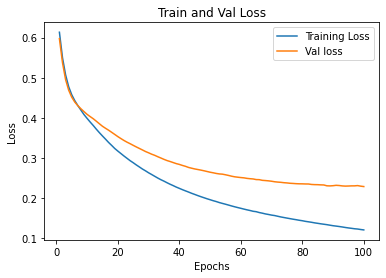

In [137]:
plt.plot(epochs, train_loss, label='Training Loss')
plt.plot(epochs, val_loss, label='Val loss')
plt.title('Train and Val Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [134]:
model.predict(x_test)

array([[0.85349655],
       [0.96600044],
       [0.9869464 ],
       [0.8823811 ],
       [0.9645677 ],
       [0.90219414],
       [0.75854   ],
       [0.9855174 ],
       [0.9566466 ],
       [0.95857006],
       [0.9442605 ],
       [0.25739437],
       [0.0403111 ],
       [0.857759  ],
       [0.99010444],
       [0.9002516 ],
       [0.98630154],
       [0.04294923],
       [0.9917169 ],
       [0.10540822],
       [0.9087155 ],
       [0.11369151],
       [0.00252366],
       [0.84151113],
       [0.9209541 ],
       [0.38072652],
       [0.07833967],
       [0.07021585],
       [0.11457428],
       [0.93902254],
       [0.9100219 ],
       [0.98223865],
       [0.97854495],
       [0.9779496 ],
       [0.97943366],
       [0.00269234],
       [0.8989594 ],
       [0.96589154],
       [0.36125922],
       [0.993083  ],
       [0.99232525],
       [0.9355024 ],
       [0.8418805 ],
       [0.10196266],
       [0.9863863 ],
       [0.23935771],
       [0.15806669],
       [0.972